In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import cv2

In [13]:
# Reading the original image
img = plt.imread('elon.jpg')

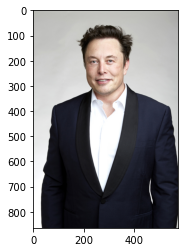

In [14]:
plt.imshow(img)

In [15]:
img.shape

(864, 576, 3)

##### Cropping the face from the original image

In [16]:
x = 150
y = 40
h = 330
w = 270

In [17]:
face = img[y:y+h, x:x+w]

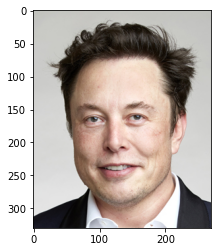

In [18]:
plt.imshow(face)

In [19]:
# Saving the cropped image 
cv2.imwrite('C:/Users/lenovo/Desktop/Repository/Computer-Vision-with-Python/elon_face.jpg',face)

True

In [22]:
# Reading original and cropped image
elon = plt.imread('elon.jpg')
elon_face = plt.imread('elon_face.jpg')

In [23]:
elon.shape

(864, 576, 3)

In [24]:
elon_face.shape

(330, 270, 3)

In [25]:
height,width,channels = elon_face.shape

In [26]:
height

330

In [27]:
width

270

In [28]:
# Different methods used in template matching 
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

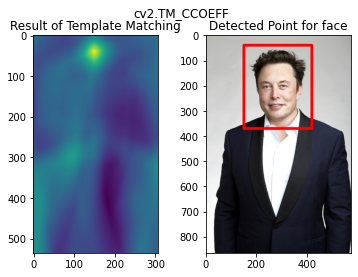

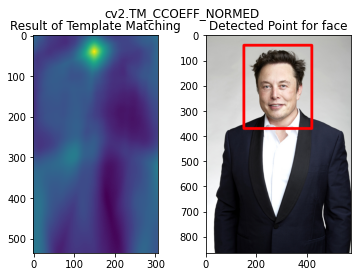

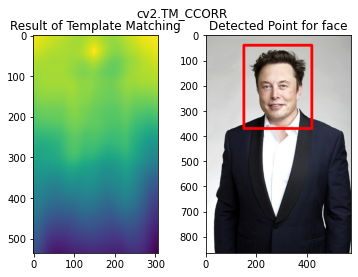

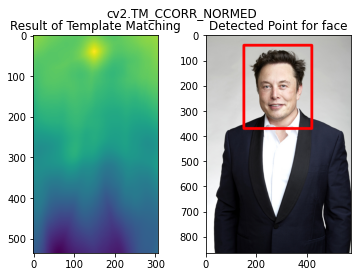

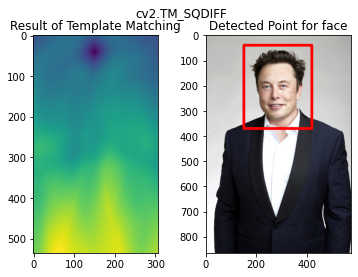

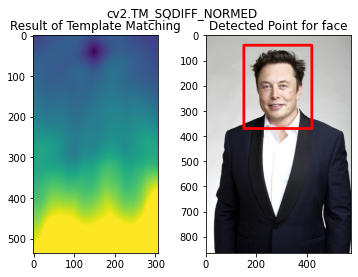

In [29]:
 for m in methods:
    
    # Create a copy of the image
    original = elon.copy()
    
    # Get the actual function instead of the string
    method = eval(m)

    # Apply template Matching with the method
    res = cv2.matchTemplate(original,elon_face,method)
    
    # Grab the Max and Min values, their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Assigning the top left of the rectangle
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(original,top_left, bottom_right, 255, 10)

    # Plot the Images
    plt.subplot(121) #plt.subplot(row col select)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(original)
    plt.title('Detected Point for face')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')